# 1. Setup & Repeatability

In [ ]:
# import libraries 
from pathlib import Path
import numpy as np
import random
import matplotlib.pyplot as plt

# control for random to repeatability 
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

# folder for any artifact
BASE_DIR = Path('.')  
ARTIFACTS = BASE_DIR / 'artifacts'
ARTIFACTS.mkdir(exist_ok=True)
ARTIFACTS.resolve()

WindowsPath('C:/Users/brand/OneDrive - Northwood University/Desktop/Class/AI/week 3/week 3 discussion/week 3 discussion code (jupyter)/artifacts')

# 2. Import everything

In [ ]:
# importing what's needed for program to run
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt


# 3. Load data & shape

In [ ]:
# loading digits data from scikit-learn and finding "shape"
digits = load_digits()
X = digits.data          
y = digits.target        
print('X shape:', X.shape)
print('y shape:', y.shape)
print('Classes:', np.unique(y))

X shape: (1797, 64)
y shape: (1797,)
Classes: [0 1 2 3 4 5 6 7 8 9]


# 3.1 Image visual check

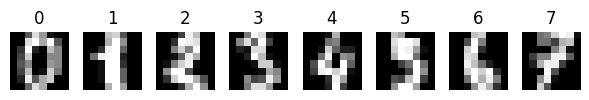

In [ ]:
# looking at data images visually to see what they look like
fig = plt.figure(figsize=(6, 2))
for i in range(8):
    ax = plt.subplot(1, 8, i+1)
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(int(y[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

# 4. Train - test - split & scaling

In [ ]:
# split data into training and test sets (20%) and scaling values for efficiency
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((1437, 64), (360, 64))

# 5. Create architecture / model

In [ ]:
# create model with two hidden layers
# use relu and adam for activation and optimization
#alpha to prevent overfitting
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    max_iter=200,
    random_state=RANDOM_STATE,
    early_stopping=True,
)
mlp

,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,42


# 6. Train the model

In [ ]:
# training the model to learn patterns
mlp.fit(X_train_scaled, y_train)
print('Your training is done. The best validation score is:', getattr(mlp, 'best_validation_score_', 'n/a'))

Your training is done. The best validation score is: 0.9791666666666666


# 7. Evaluate

In [ ]:
# tells us model accuracy for each digit
y_pred = mlp.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {acc:.2f}')
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

Test Accuracy: 0.96

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.92      0.90        36
           2       0.92      1.00      0.96        35
           3       0.97      0.95      0.96        37
           4       0.95      1.00      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.94      0.97        36
           7       1.00      1.00      1.00        36
           8       0.91      0.89      0.90        35
           9       1.00      0.94      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



# 8. Confusion matrix

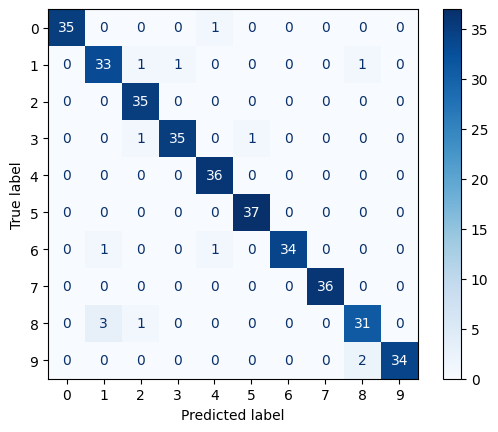

In [ ]:
# confusion matrix to show what the model confuses the most
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()
